In [2]:
import sympy as sp
from sympy import *
from sympy.plotting import plot


import IPython.display as disp

sp.init_printing(use_latex='mathjax')

from qutip import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X_gate = sp.Matrix([[0, 1], [1, 0]])
Y_gate = sp.Matrix([[0, -I], [I, 0]])
Z_gate = sp.Matrix([[1, 0], [0, -1]])

In [4]:
a = sp.Symbol('a')
phi = sp.Symbol('\phi')
W = sp.Matrix([[a, I*sp.sqrt(1-a**2)], [I*sp.sqrt(1-a**2), a]])
#S = sp.exp(I*phi*Z_gate)
disp.display(W)

def S(phi_vec, k):
    return sp.exp(I*phi_vec[k]*Z_gate)

⎡                    ________⎤
⎢                   ╱      2 ⎥
⎢      a        ⅈ⋅╲╱  1 - a  ⎥
⎢                            ⎥
⎢     ________               ⎥
⎢    ╱      2                ⎥
⎣ⅈ⋅╲╱  1 - a          a      ⎦

In [5]:
eta = sp.Symbol('\eta')
eta = 1/2*sp.acos(-1/4)
phi_vector_bb1 = sp.Matrix([sp.pi/2, -eta, 2*eta, 0, -2*eta, eta])

for i in range(len(phi_vector_bb1)):
    disp.display(S(phi_vector_bb1, i))

⎡ⅈ  0 ⎤
⎢     ⎥
⎣0  -ⅈ⎦

⎡     -0.911738290968488⋅ⅈ                          ⎤
⎢1.0⋅ℯ                                 0            ⎥
⎢                                                   ⎥
⎢                                0.911738290968488⋅ⅈ⎥
⎣            0              1.0⋅ℯ                   ⎦

⎡     1.82347658193698⋅ⅈ                          ⎤
⎢1.0⋅ℯ                               0            ⎥
⎢                                                 ⎥
⎢                              -1.82347658193698⋅ⅈ⎥
⎣           0             1.0⋅ℯ                   ⎦

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

⎡     -1.82347658193698⋅ⅈ                         ⎤
⎢1.0⋅ℯ                                0           ⎥
⎢                                                 ⎥
⎢                               1.82347658193698⋅ⅈ⎥
⎣           0              1.0⋅ℯ                  ⎦

⎡     0.911738290968488⋅ⅈ                           ⎤
⎢1.0⋅ℯ                                 0            ⎥
⎢                                                   ⎥
⎢                               -0.911738290968488⋅ⅈ⎥
⎣           0              1.0⋅ℯ                    ⎦

In [6]:
def QSP(phi_vector):
    result = S(phi_vector, 0)
    for i in range (1, len(phi_vector)):
        result *= W * S(phi_vector, i)
    return result

theta = sp.Symbol('θ')
theta = -2*sp.acos(a)
bb1_analytical = 1/8*sp.cos(theta/2)**2 * (3*sp.cos(theta/2)**8 -  18*sp.cos(theta/2)**6 + 35*sp.cos(theta/2)**4 - 45*sp.cos(theta/2)**2 + 30) 
transformed = QSP(phi_vector_bb1)
p = transformed[0,0]**2
disp.display(p.simplify())
disp.display(bb1_analytical)

                                                                              
     2                                            ⎛⎛ 2    ⎞ ⎛   2             
1.0⋅a ⋅(0.0546874999999639 - 0.998503518944102⋅ⅈ)⋅⎝⎝a  - 1⎠⋅⎝- a ⋅(0.306186217

                                                                              
                                                                        ⎛ 2   
847903 - 1.18585412256314⋅ⅈ) - (0.306186217847903 - 1.18585412256314⋅ⅈ)⋅⎝a  - 

                                                                              
 ⎞     ⎛ 2  0.911738290968492⋅ⅈ   ⎛ 2    ⎞  2.73521487290547⋅ⅈ⎞  3.64695316387
1⎠ + 2⋅⎝a ⋅ℯ                    + ⎝a  - 1⎠⋅ℯ                  ⎠⋅ℯ             

                                                                              
396⋅ⅈ⎞  4.55869145484245⋅ⅈ   ⎛ 2 ⎛                                          ⎛ 
     ⎠⋅ℯ                   - ⎝a ⋅⎝(-0.306186217847903 + 1.18585412256314⋅ⅈ)⋅⎝1

                                                

       2 ⎛   8       6       4       2     ⎞
0.125⋅a ⋅⎝3⋅a  - 18⋅a  + 35⋅a  - 45⋅a  + 30⎠

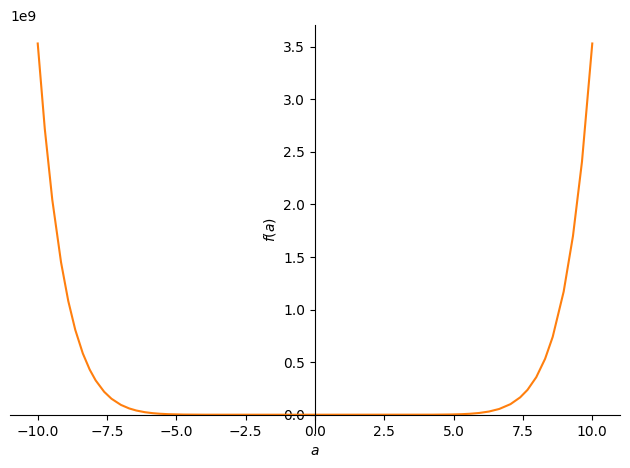

In [7]:
p1 = plot(p, show=False)
p2 = plot(bb1_analytical, show=False)
p1.append(p2[0])
p1.show()

⎡                                                         ________        ____
⎢                    3                               2   ╱      2        ╱    
⎢                 4⋅a  - 3⋅a                    2⋅ⅈ⋅a ⋅╲╱  1 - a   + ⅈ⋅╲╱  1 -
⎢                                                                             
⎢          ________        ________                                           
⎢     2   ╱      2        ╱      2  ⎛   2    ⎞                      3         
⎣2⋅ⅈ⋅a ⋅╲╱  1 - a   + ⅈ⋅╲╱  1 - a  ⋅⎝2⋅a  - 1⎠                   4⋅a  - 3⋅a   

____           ⎤
  2  ⎛   2    ⎞⎥
 a  ⋅⎝2⋅a  - 1⎠⎥
               ⎥
               ⎥
               ⎥
               ⎦

              2
│  ⎛   2    ⎞│ 
│a⋅⎝4⋅a  - 3⎠│ 

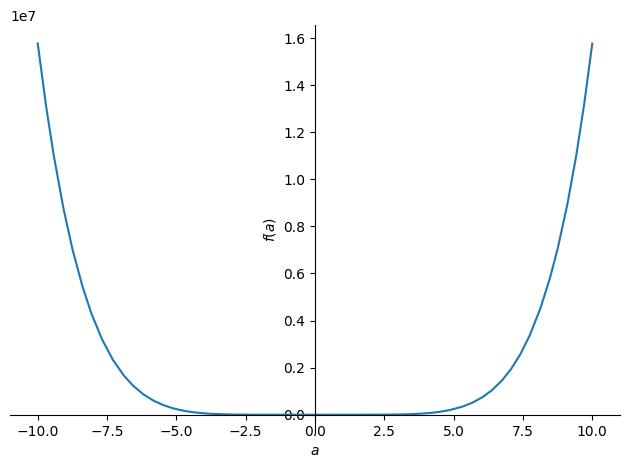

In [8]:
signal = W**3
poly = sp.Abs(signal[0,0].simplify())**2
disp.display(signal)
disp.display(poly)
plot(poly)

In [61]:
disp.display(p.subs('a', 1/sp.sqrt(14)).evalf())
disp.display(p.subs('a', -2/sp.sqrt(14)).evalf())
disp.display(p.subs('a', 3/sp.sqrt(14)).evalf())

-0.215811596823498 - 0.106601980967632⋅ⅈ

-0.667642202653661 - 0.218556711038181⋅ⅈ

-0.964447302928098 - 0.0973682299716263⋅ⅈ